In [245]:
import nmap
# Single Thread Version
nm = nmap.PortScanner()
group_1 = "19-26,42-43,49,79-85,88-90,125,143-144,146"
nm.scan(hosts='183.232.231.173/24', ports=group_1, arguments="-PA{} -T5".format(group_1,group_1))
print(nm.command_line())
print(nm.scaninfo())
print(nm.scanstats())

# class Scan:
#     def __init__(self, caseNum, address, ports, arguments):
#         self.caseNum = caseNum
#         self.address = address
#         self.ports = ports
#         self.arguments = arguments
        
#     # Run one scan
#     def nmap_scan(self):
#         self.scanner = nmap.PortScanner()
#         self.scanner.scan(self.address, self.ports, self.arguments)
#         print("============ " + self.address + "; " + self.ports + " scan finished =============")
#         print(self.scanner.command_line())
#         print(self.scanner.scaninfo())
#         print(self.scanner.scanstats())
# t1 = Scan(1, '183.232.231.173', "1", "-O -sU --max-rate 1000")
# t1.nmap_scan()

nmap -oX - -p 19-26,42-43,49,79-85,88-90,125,143-144,146 -PS19-26,42-43,49,79-85,88-90,125,143-144,146 -T5 183.232.231.173/24
{'tcp': {'method': 'syn', 'services': '19-26,42-43,49,79-85,88-90,125,143-144,146'}}
{'timestr': 'Thu Apr 23 00:46:01 2020', 'elapsed': '138.80', 'uphosts': '58', 'downhosts': '198', 'totalhosts': '256'}


In [239]:
scanner = nm
for host in scanner.all_hosts():
    for port in scanner[host].all_tcp():
        print(scanner[host]['tcp'][port]['version'])
#     if 'osmatch' in scanner[host].keys() and len(scanner[host]['osmatch']) > 0:
#         name = scanner[host]['osmatch'][0]['name']
#     else:
#         name = "null"
#     print(name)
# nm['183.232.231.173']['osmatch']





















































































































































































































































































































































































































































































































































































































































































































































































































1.8.1

















































































































































































































In [231]:
# Simple Multi-threads Version
import nmap
import json
import masscan
import threading
import time

# nm = nmap.PortScanner()
# nm.scan('47.240.84.0/24', ports='22,80,8080', arguments='--max-rate 1000')
# print("Nmap scan finish")

class myThread (threading.Thread):
    def __init__(self, threadID, threadName, address, ports, arguments):
        threading.Thread.__init__(self)
        self.threadID = threadID
        self.threadName = threadName
        self.address = address
        self.ports = ports
        self.arguments = arguments

    def run(self):
        print ("Starting " + self.threadName)
        nmap_scan(self.threadName, self.address, self.ports, self.arguments)
        print ("Exiting " + self.threadName)

def nmap_scan(threadName, address, ports, arguments):
    nm = nmap.PortScanner()
    nm.scan(address, ports=ports, arguments=arguments)
    print("===================================")
    print("Nmap:" + threadName + " scan finish")
    print(nm.command_line())
    print(nm.scaninfo())
    print(nm.scanstats())

# Create New Threads
thread1 = myThread(1, "T1", '47.240.0.0/24', ports='22', arguments='--max-rate 1000')
thread2 = myThread(2, "T2", '47.240.0.0/24', ports='22,80,8080', arguments='--max-rate 1000')
thread3 = myThread(3, "T3", '47.240.1.0/24', ports='22,80,8080', arguments='--max-rate 1000')
thread4 = myThread(4, "T4", '47.240.0.0/23', ports='22,80,8080', arguments='--max-rate 1000')

# Start Threads
thread1.start()
thread2.start()
thread3.start()
thread4.start()
thread1.join()
thread2.join()
thread3.join()
thread4.join()
print("Scan Over - Exit main thread.")


Starting T1
Starting T2Starting T3

Starting T4


Exception in thread Thread-11:
Traceback (most recent call last):
  File "/Users/jerrio/anaconda3/lib/python3.7/site-packages/nmap/nmap.py", line 322, in analyse_nmap_xml_scan
    dom = ET.fromstring(self._nmap_last_output)
  File "/Users/jerrio/anaconda3/lib/python3.7/xml/etree/ElementTree.py", line 1316, in XML
    return parser.close()
  File "<string>", line None
xml.etree.ElementTree.ParseError: no element found: line 7, column 0

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/jerrio/anaconda3/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "<ipython-input-231-d1069e352528>", line 23, in run
    nmap_scan(self.threadName, self.address, self.ports, self.arguments)
  File "<ipython-input-231-d1069e352528>", line 28, in nmap_scan
    nm.scan(address, ports=ports, arguments=arguments)
  File "/Users/jerrio/anaconda3/lib/python3.7/site-packages/nmap/nmap.py", line 266, in scan
    n

KeyboardInterrupt: 

In [3]:
#! /usr/bin/env python
# -*- coding: utf-8 -*-
import nmap
import masscan
from concurrent.futures import ThreadPoolExecutor
import time
import random
import numpy as np

# Data Structure:
# cases:[
#   ...case:[
#     t1, t2, t3, t4
#   ]
# ]

class Scan:
    def __init__(self, caseNum, address, ports, arguments):
        self.caseNum = caseNum
        self.address = address
        self.ports = ports
        self.arguments = arguments
        
    # Run one scan
    def nmap_scan(self):
        self.scanner = nmap.PortScanner()
        try:
            self.scanner.scan(self.address, self.ports, self.arguments)
            print("============ " + str(self.caseNum) + " scan finished =============")
            print(self.scanner.command_line())
            print(self.scanner.scaninfo())
            print(self.scanner.scanstats())
        except Exception as e:
            print(e)
    
    def mas_scan(self):
        self.scanner = masscan.PortScanner()
        try:
            self.scanner.scan(self.address, self.ports, self.arguments)
            print("============ " + str(self.caseNum) + " scan finished =============")
            print(self.scanner.command_line)
            print(self.scanner.scaninfo)
            print(self.scanner.scanstats)
        except Exception as e:
            print(e)


# Generate test cases
def generateCases(first_min, first_max, second_min, second_max):
    # Generate 100 cases automatically.
    # Scope: a~b.c~d.0.0
    count = 0 
    cases = [] # case list
    for i in range(first_min, first_max+1):
        for j in range(second_min, second_max+1):
            case = [] # one case
            t1 = Scan(str(i)+"."+str(j)+".0.0/24", "22", "--max-rate 1000")
            t2 = Scan(str(i)+"."+str(j)+".0.0/24", "22,80,8080", "--max-rate 1000")
            t3 = Scan(str(i)+"."+str(j)+".1.0/24", "22,80,8080", "--max-rate 1000")
            t4 = Scan(str(i)+"."+str(j)+".0.0/23", "22,80,8080", "--max-rate 1000")
            case.append(t1)
            case.append(t2)
            case.append(t3)
            case.append(t4)
            cases.append(case)
            count+=1
    print("Generate "+ str(count) + " cases completed.")
    return cases

# Generate test cases randomly
def generateCasesRandomly(num, seed):
    # Generate 100 cases randomly by a seed.
    # Scope: 0~255.0~255.0~255.0
    if seed != None:
        random.seed(seed)
    count = 0 
    cases = [] # case list
    while count < num:
        case = [] # one case
        segment_1 = "{}.{}.{}.0/24".format(random.randint(0,255), random.randint(0,255), random.randint(0,255))
        segment_2 = "{}.{}.{}.0/24".format(random.randint(0,255), random.randint(0,255), random.randint(0,255))
        # groups of common ports
        group_1 = "21-23,69,80,143-144,1158,1521"
        group_2 = "222,306,366,389,443,1433-1434,8080,8081"
        
        # MR1: h(t0)+h(t1)=h(t2); MR2: h(t3)>=h(t0); MR3: h(t0)⊆h(t3); MR4: h(t0)=h(t0); MR5: h(t5)>=h(t4); 
        # MR6: o(t6)=o(t7)
        t0 = Scan(count, segment_1, "{}".format(group_1), "-T4")
        t1 = Scan(count, segment_2, "{}".format(group_1), "-T4")
        t2 = Scan(count, segment_1 + " " + segment_2, "{}".format(group_1), "-T4")
        t3 = Scan(count, segment_1, "{},{}".format(group_1,group_2), "-T4")
        t4 = Scan(count, segment_1, group_1, "-PS{} -T4".format(group_1))
        t5 = Scan(count, segment_1, group_1, "-PS{} -PA{} -T4".format(group_1,group_1))
        # Considering OS detecting will be slow, I only check some common ports.
        t6 = Scan(count, segment_1, "{}".format(group_1), "-O --max-os-tries 1")
        t7 = Scan(count, segment_1, "{}".format(group_1), "-O --randomize-hosts --max-os-tries 1")

        case.append(t0)
        case.append(t1)
        case.append(t2)
        case.append(t3)
        case.append(t4)
        case.append(t5)
        case.append(t6)
        case.append(t7)
        cases.append(case)
        count+=1
    print("Generate {} cases with seed {} completed.".format(str(count), str(seed)))
    return cases


# Generate test cases randomly for Masscan
def generateCasesRandomly2(num, seed):
    # Generate 100 cases randomly.
    # Scope: 0~255.0~255.0~255.0
    if seed != None:
        random.seed(seed)
    count = 0 
    cases = [] # case list
    while count < num:
        case = [] # one case
        segment_1 = "{}.{}.0.0/24".format(random.randint(0,255), random.randint(0,255))
        segment_2 = "{}.{}.0.0/24".format(random.randint(0,255), random.randint(0,255))
        t1 = Scan(count, segment_1, "22", "--max-rate 1000")
        t2 = Scan(count, segment_1, "22,80,8080", "--max-rate 1000")
        t3 = Scan(count, segment_2, "22,80,8080", "--max-rate 1000")
        t4 = Scan(count, segment_1 + " " + segment_2, "22,80,8080", "--max-rate 1000")
        case.append(t1)
        case.append(t2)
        case.append(t3)
        case.append(t4)
        cases.append(case)
        count+=1
    print("Generate "+ str(count) + " cases completed.")
    return cases


# Run one test
def runTest(t):
    if(scan_type == 'masscan'):
        t.mas_scan()
    else:
        t.nmap_scan()
    
# Run one turn
def runOneTurn(case, order):
    print("Runing round " + str(order) + "...")
    with ThreadPoolExecutor(MAX_SUBTHREADS_SIZE) as executor1:
        for t in case:
            executor1.submit(runTest, t)
    
MAX_THREADS_SIZE = 1 # The max number of threads held in the pool.
MAX_SUBTHREADS_SIZE = 8 # The max number of threads held in the sub-pool.
                        # Final threads number = MAX_THREADS_SIZE * MAX_SUBTHREADS_SIZE
scan_type = 'nmap' # nmap or masscan
    
if __name__ == '__main__':
    start1=time.time()
    # cases = generateCases(47, 56, 240, 249) # Generate 100 cases, Scope: 47~56.240~249.0.0
    # cases = generateCases(47, 56, 240, 240) # Generate 10 cases, Scope: 47~56.240.0.0
    # cases = generateCases(47, 47, 240, 241) # Generate 2 cases, Scope: 47.240~242.0.0
    seed = 0
    cases = generateCasesRandomly(20, seed)
    bad_cases = [] # Store the bad cases which don't want to verify
    
    # Start Scanning
    with ThreadPoolExecutor(MAX_THREADS_SIZE) as executor:
        for i in range(len(cases)):
            executor.submit(runOneTurn, cases[i], i)
            
    end1=time.time()
    print("Scan Finished: "+ str(len(cases)) + " cases; Time Cost:" + str(end1-start1) + "s")
    
#     mrVerification(cases)
    

Generate 20 cases with seed 0 completed.
Scan Finished: 20 cases; Time Cost:0.00040602684020996094s


In [109]:
import masscan
try:
    mas = masscan.PortScanner()
    mas.scan('192.28.231.0', ports='22,80,8080', arguments='--max-rate 1000')
    print("Masscan scan finish")
except NetworkConnectionError:
    print("get")

[2020-05-09 18:15:45,684] [DEBUG] [masscan.py 10 line] Scan parameters: "masscan -oX - 192.28.231.0 -p 22,80,8080 --max-rate 1000"


NameError: name 'NetworkConnectionError' is not defined

In [350]:
# mas.scan('192.28.231.0/24', ports='22,80,8080', arguments='--max-rate 1000')


In [6]:
import numpy as np


# MR1 Verification
# Input: up-hosts number of t0,t1,t2.
# Expectation: the number of up-hosts t0 finding should equal to the sum of t1 and t2.
def mr1Verification(t0, t1, t2):
    t0_result = t0.scanner.scanstats()
    t1_result = t1.scanner.scanstats()
    t2_result = t2.scanner.scanstats()
    
    uphost_mean = round((int(t0_result['uphosts']) + int(t1_result['uphosts']) + int(t2_result['uphosts']))/4, 2)
    downhost_mean = round((int(t0_result['downhosts']) + int(t1_result['downhosts']) + int(t2_result['downhosts']))/4, 2)
    num_difference = abs(int(t1_result['uphosts']) + int(t2_result['uphosts']) - int(t0_result['uphosts']))
    time_mean = round((float(t0_result['elapsed']) + float(t1_result['elapsed']) + float(t2_result['elapsed']))/4, 2)
    time_difference = abs(round(float(t0_result['elapsed']) - time_mean, 2))
    if num_difference == 0:
        isPass = True
    else:
        isPass = False

    return isPass, uphost_mean, downhost_mean, num_difference, time_mean, time_difference

# MR2 Verification
# Input: up-hosts number of t0,t1.
# Expectation: the number of up-hosts t1 finding should be more than or equal to t0.
def mr2Verification(t0, t1):
    t0_result = t0.scanner.scanstats()
    t1_result = t1.scanner.scanstats()
    
    uphost_mean = round((int(t0_result['uphosts']) + int(t1_result['uphosts']))/2, 2)
    downhost_mean = round((int(t0_result['downhosts']) + int(t1_result['downhosts']))/2, 2)
    num_difference = abs(int(t0_result['uphosts']) - int(t1_result['uphosts']))
    time_mean = round(float(t0_result['elapsed']) + float(t1_result['elapsed'])/2, 2)
    time_difference = abs(round(float(t0_result['elapsed']) - float(t1_result['elapsed']), 2))
    
    if int(t1_result['uphosts']) >= int(t0_result['uphosts']):
        isPass = True
    else:
        isPass = False
    
    return isPass, uphost_mean, downhost_mean, num_difference, time_mean, time_difference

# MR3 Verification
# Input: up-hosts of t0,t1.
# Expectation: all up-hosts in t0 should also in t1.
def mr3Verification(t0, t1):
    t0_result = t0.scanner.scanstats()
    t1_result = t1.scanner.scanstats()
    
    uphost_mean = round((int(t0_result['uphosts']) + int(t1_result['uphosts']))/2, 2)
    downhost_mean = round((int(t0_result['downhosts']) + int(t1_result['downhosts']))/2, 2)
    num_difference = abs(int(t0_result['uphosts']) - int(t1_result['uphosts']))
    time_mean = round(float(t0_result['elapsed']) + float(t1_result['elapsed'])/2, 2)
    time_difference = abs(round(float(t0_result['elapsed']) - float(t1_result['elapsed']), 2))
    
    isPass = True
    for host in t0.scanner.all_hosts():
        if host not in t1.scanner.all_hosts():
            isPass = False
    
    return isPass, uphost_mean, downhost_mean, num_difference, time_mean, time_difference

# MR4 Verification
# Input: up-hosts number of t0,t1.
# Expectation: up-hosts number of t0 and t1 should be the same.
def mr4Verification(t0, t1):
    t0_result = t0.scanner.scanstats()
    t1_result = t1.scanner.scanstats()
    
    uphost_mean = round((int(t0_result['uphosts']) + int(t1_result['uphosts']))/2, 2)
    downhost_mean = round((int(t0_result['downhosts']) + int(t1_result['downhosts']))/2, 2)
    num_difference = abs(int(t0_result['uphosts']) - int(t1_result['uphosts']))
    time_mean = round(float(t0_result['elapsed']) + float(t1_result['elapsed'])/2, 2)
    time_difference = abs(round(float(t0_result['elapsed']) - float(t1_result['elapsed']), 2))
    
    if num_difference == 0:
        isPass = True
    else:
        isPass = False
    
    return isPass, uphost_mean, downhost_mean, num_difference, time_mean, time_difference

# MR5 Verification
# Input: up-hosts number of t0,t1.
# Expectation: the number of up-hosts t1 finding should be more than or equal to t0.
def mr5Verification(t0, t1):
    t0_result = t0.scanner.scanstats()
    t1_result = t1.scanner.scanstats()
    
    uphost_mean = round((int(t0_result['uphosts']) + int(t1_result['uphosts']))/2, 2)
    downhost_mean = round((int(t0_result['downhosts']) + int(t1_result['downhosts']))/2, 2)
    num_difference = abs(int(t0_result['uphosts']) - int(t1_result['uphosts']))
    time_mean = round(float(t0_result['elapsed']) + float(t1_result['elapsed'])/2, 2)
    time_difference = abs(round(float(t0_result['elapsed']) - float(t1_result['elapsed']), 2))
    
    if int(t1_result['uphosts']) >= int(t0_result['uphosts']):
        isPass = True
    else:
        isPass = False
    
    return isPass, uphost_mean, downhost_mean, num_difference, time_mean, time_difference

# MR6 Verification
# Input: OS of host detected in task t0 and t1.
# Expectation: these two tasks should give the same operating system detected for one host. 
#              Don't check those hosts do not exist in both tasks
def mr6Verification(t0, t1):
    t0_result = t0.scanner.scanstats()
    t1_result = t1.scanner.scanstats()
    
    uphost_mean = round((int(t0_result['uphosts']) + int(t1_result['uphosts']))/2, 2)
    downhost_mean = round((int(t0_result['downhosts']) + int(t1_result['downhosts']))/2, 2)
    num_difference = abs(int(t0_result['uphosts']) - int(t1_result['uphosts']))
    time_mean = round(float(t0_result['elapsed']) + float(t1_result['elapsed'])/2, 2)
    time_difference = abs(round(float(t0_result['elapsed']) - float(t1_result['elapsed']), 2))

    isPass = True
    for host in t0.scanner.all_hosts():
        if len(t0.scanner[host]['osmatch']) > 0 and len(t1.scanner[host]['osmatch']) > 0:
            if t0.scanner[host]['osmatch'][0]['name'] != t0.scanner[host]['osmatch'][0]['name']:
                isPass = False
        elif len(t0.scanner[host]['osmatch']) + len(t1.scanner[host]['osmatch']) > 0:
            # one of them greater than 0
            isPass = False
    
    return isPass, uphost_mean, downhost_mean, num_difference, time_mean, time_difference

# MR Verification
# pass rate: the pass rate regard to a metamorphic relation
# time mean: the mean of time to scan a segment (256 hosts)
# time difference: the difference between running one scan command and time mean
# time mean of fail case: the time mean of fail cases
# time difference in fail cases: the mean of time difference of fail cases
# num difference in fail cases: the mean of up host number difference of between expectation and result
# max num difference in fail cases: the maximum of num difference in fail cases
def mrVerification(cases):
    class MrResult:
        def __init__(self):
            self.bad_cases = 0
            self.pass_count = 0
            self.total_time_mean = []
            self.total_time_difference = []
            self.fail_total_time_mean = []
            self.fail_total_time_difference = []
            self.fail_total_num_difference = []
    
    MRNUMBER = 6
    mrResults = [] # A list storing the result of each MR verification.
    for mr in range(1,MRNUMBER+1):
        mrResult = MrResult()
        for i in range(len(cases)):

            case = cases[i]
            result = None
#             if(scan_type == 'masscan'):
#                 t1_result = case[0].scanner.scanstats
#                 t2_result = case[1].scanner.scanstats
#                 t3_result = case[2].scanner.scanstats
#                 t4_result = case[3].scanner.scanstats
#             else:
#                 for i in range(len(case)):
#                     t1_result = case[0].scanner.scanstats()
#                     t2_result = case[1].scanner.scanstats()
#                     t3_result = case[2].scanner.scanstats()
#                     t4_result = case[3].scanner.scanstats()

            # MR1: h(t2)=h(t0)+h(t1); MR2: h(t3)>=h(t0); MR3: h(t0)⊆h(t3); MR4: h(t6)=h(t7); MR5: h(t5)>=h(t4); 
            # MR6: o(t6)=o(t7)
            try:
                if mr == 1:
                    # MR1: h(t2)=h(t0)+h(t1)
                    result = mr1Verification(case[2], case[0], case[1])
                elif mr == 2:
                    # MR2: h(t3)>=h(t0)
                    result = mr2Verification(case[0], case[3])
                elif mr == 3:
                    # MR3: h(t0)⊆h(t3)
                    result = mr3Verification(case[0], case[3])
                elif mr == 4:
                    # MR4: h(t6)=h(t7)
                    result = mr4Verification(case[6], case[7])
                elif mr == 5: 
                    # MR5: h(t5)>=h(t4)
                    result = mr5Verification(case[4], case[5])
                elif mr == 6:
                    # MR6: o(t6)=o(t7)
                    result = mr6Verification(case[6], case[7])
                    
                # result = [isPass, uphost_mean, downhost_mean, num_difference, time_mean, time_difference]
                if result != None:
                    if result[0] == True:
                        print("MR{} Case{} [PASS] Uphost_Mean:{} Downhost_Mean:{} Num_Diff:{} Time_Mean:{}s Time_Diff:{}s"
                          .format(mr, i, result[1], result[2], result[3], result[4], result[5]))
                        mrResult.pass_count+=1
                    else:
                        print("\033[1;31;44mMR{} Case{} [FAIL] Uphost_Mean:{} Downhost_Mean:{} Num_Diff:{} Time_Mean:{}s Time_Diff:{}s\033[0m"
                          .format(mr, i, result[1], result[2], result[3], result[4], result[5]))
                        mrResult.fail_total_num_difference.append(result[3])
                        mrResult.fail_total_time_mean.append(result[4])
                        mrResult.fail_total_time_difference.append(result[5])

                    # Store value to calculate mean 
                    mrResult.total_time_mean.append(result[4])
                    mrResult.total_time_difference.append(result[5])
            except Exception as e:
                print("Case{} throws an exception: {}".format(i, e))
                mrResult.bad_cases+=1
                
        mrResults.append(mrResult)
        # end for 
    # end for  
    
            # Test Output
            # print(t1_result)
            # print(t2_result)
            # print(t3_result)
            # print(t4_result)
            # print(case[0].scanner.command_line())
            # print(case[0].scanner.scaninfo())
            # print(case[0].scanner.scanstats())   

    
    print("**** Verification Result ****")
    for i in range(len(mrResults)):
        mrResult = mrResults[i]
        validNum = len(cases) - mrResult.bad_cases
        pass_rate = 0 if validNum == 0 else (round(mrResult.pass_count / validNum, 4) * 100) 
        print("MR{} pass rate: {}% ({}/{})".format(i+1, pass_rate, mrResult.pass_count, validNum))
        print("MR{} time mean: {}s".format(i+1, round(np.mean(mrResult.total_time_mean), 2)))
        print("MR{} time difference: {}s".format(i+1, round(np.mean(mrResult.total_time_difference), 2)))
        print("MR{} time mean in fail cases: {}s".format(i+1, round(np.mean(mrResult.fail_total_time_mean), 2)))
        print("MR{} time difference in fail cases: {}s".format(i+1, round(np.mean(mrResult.fail_total_time_difference), 2)))
        print("MR{} num difference in fail cases: {}".format(i+1, round(np.mean(mrResult.fail_total_num_difference), 2)))
        print("MR{} max num difference in fail case: {}\n"
              .format(i+1, round(max(mrResult.fail_total_num_difference) 
                           if len(mrResult.fail_total_num_difference) > 0 else 0, 2)))

mrVerification(cases)


Case0 throws an exception: 'Scan' object has no attribute 'scanner'
Case1 throws an exception: 'Scan' object has no attribute 'scanner'
Case2 throws an exception: 'Scan' object has no attribute 'scanner'
Case3 throws an exception: 'Scan' object has no attribute 'scanner'
Case4 throws an exception: 'Scan' object has no attribute 'scanner'
Case5 throws an exception: 'Scan' object has no attribute 'scanner'
Case6 throws an exception: 'Scan' object has no attribute 'scanner'
Case7 throws an exception: 'Scan' object has no attribute 'scanner'
Case8 throws an exception: 'Scan' object has no attribute 'scanner'
Case9 throws an exception: 'Scan' object has no attribute 'scanner'
Case10 throws an exception: 'Scan' object has no attribute 'scanner'
Case11 throws an exception: 'Scan' object has no attribute 'scanner'
Case12 throws an exception: 'Scan' object has no attribute 'scanner'
Case13 throws an exception: 'Scan' object has no attribute 'scanner'
Case14 throws an exception: 'Scan' object ha

In [92]:
# mrVerification(data['cases'])

In [266]:
# Store object into file
import pickle
data = {
    'cases' : cases, 
    'seed' : seed,
}
f1 = open('50casesNmap-v1.2-06.txt','wb')
pickle.dump(data,f1)
f1.flush()
f1.close()

In [7]:
# Read python object from file
import pickle
read_file = open('50casesNmap-v1.2-06.txt','rb')
data = pickle.load(read_file)
# print(data)
read_file.close()

mrVerification(data['cases'])

MR1 Case0 [PASS] Uphost_Mean:0.5 Downhost_Mean:255.5 Num_Diff:0 Time_Mean:38.82s Time_Diff:0.42s
MR1 Case1 [FAIL] Uphost_Mean:57.25 Downhost_Mean:198.75 Num_Diff:7 Time_Mean:53.64s Time_Diff:39.59s
MR1 Case2 [FAIL] Uphost_Mean:2.25 Downhost_Mean:253.75 Num_Diff:1 Time_Mean:167.57s Time_Diff:346.73s
MR1 Case3 [PASS] Uphost_Mean:0.0 Downhost_Mean:256.0 Num_Diff:0 Time_Mean:52.98s Time_Diff:52.87s
MR1 Case4 [PASS] Uphost_Mean:0.0 Downhost_Mean:256.0 Num_Diff:0 Time_Mean:31.95s Time_Diff:31.89s
MR1 Case5 [PASS] Uphost_Mean:0.0 Downhost_Mean:256.0 Num_Diff:0 Time_Mean:52.91s Time_Diff:52.74s
MR1 Case6 [FAIL] Uphost_Mean:122.0 Downhost_Mean:134.0 Num_Diff:8 Time_Mean:91.41s Time_Diff:57.6s
MR1 Case7 [FAIL] Uphost_Mean:73.5 Downhost_Mean:182.5 Num_Diff:6 Time_Mean:57.73s Time_Diff:36.97s
MR1 Case8 [PASS] Uphost_Mean:0.0 Downhost_Mean:256.0 Num_Diff:0 Time_Mean:52.75s Time_Diff:52.5s
MR1 Case9 [PASS] Uphost_Mean:0.0 Downhost_Mean:256.0 Num_Diff:0 Time_Mean:52.68s Time_Diff:52.28s
MR1 Case10 [F

In [481]:
# mrVerification(data, [])
# data[0][0].scanner.scanstats()
s = data[0][3].scanner
# s.all_hosts()
s[s.all_hosts()[0]]
# s[s.all_hosts()[0]].all_protocols()
# s[s.all_hosts()[0]]['tcp'].keys()
# s.csv()

{'hostnames': [{'name': '', 'type': ''}],
 'addresses': {'ipv4': '47.240.0.1'},
 'vendor': {},
 'status': {'state': 'up', 'reason': 'syn-ack'},
 'tcp': {22: {'state': 'open',
   'reason': 'syn-ack',
   'name': 'ssh',
   'product': '',
   'version': '',
   'extrainfo': '',
   'conf': '3',
   'cpe': ''},
  80: {'state': 'open',
   'reason': 'syn-ack',
   'name': 'http',
   'product': '',
   'version': '',
   'extrainfo': '',
   'conf': '3',
   'cpe': ''},
  8080: {'state': 'filtered',
   'reason': 'no-response',
   'name': 'http-proxy',
   'product': '',
   'version': '',
   'extrainfo': '',
   'conf': '3',
   'cpe': ''}}}

In [98]:
import nmap

nm = nmap.PortScanner()
nm.scan("127.0.0.1", ports="22, 60-90" ,arguments="-sU -sV")
if 'osclass' in nm['127.0.0.1']:
    for osclass in nm['127.0.0.1']['osclass']:
        print('OsClass.type : {0}'.format(osclass['type']))
        print('OsClass.vendor : {0}'.format(osclass['vendor']))
        print('OsClass.osfamily : {0}'.format(osclass['osfamily']))
        print('OsClass.osgen : {0}'.format(osclass['osgen']))
        print('OsClass.accuracy : {0}'.format(osclass['accuracy']))
        print('')

In [21]:
try:
    a = cases[0][2].scanner
    print(a.command_line())
    print(a.scaninfo())
    print(a.scanstats())
except e:
    print(e)

NameError: name 'e' is not defined

In [220]:
# random.seed()
# for i in range(10):
#     segment_1 = "{}.{}.{}.0/24".format(random.randint(0,255), random.randint(0,255), random.randint(0,255))
#     segment_2 = "{}.{}.{}.0/24".format(random.randint(0,255), random.randint(0,255), random.randint(0,255))
#     print(segment_1)
#     print(segment_2)

In [216]:
# a = cases[0][7].scanner['68.32.130.117']
# print('osmatch' in a)
t0 = cases[0][6]
t1 = cases[0][7]
isPass = True
for host in t0.scanner.all_hosts():
    if host in t1.scanner.all_hosts():
        print('osmatch' in t0.scanner[host])
        print('osmatch' in t1.scanner[host])
        if len(t0.scanner[host]['osmatch']) > 0 and len(t1.scanner[host]['osmatch']) > 0:
            if t0.scanner[host]['osmatch'][0]['name'] != t0.scanner[host]['osmatch'][0]['name']:
                isPass = False
        elif len(t0.scanner[host]['osmatch']) + len(t1.scanner[host]['osmatch']) > 0:
            # one of them greater than 0
            isPass = False
    else:
        print (host)

True
True
True
True
True
True
68.32.130.107
68.32.130.108
True
True
68.32.130.111
True
True
True
True
68.32.130.118
68.32.130.119
True
True
True
True
68.32.130.124
True
True
True
True
True
True
68.32.130.14
68.32.130.149
68.32.130.150
True
True
68.32.130.153
True
True
True
True
True
True
True
True
True
True
True
True
True
True
68.32.130.162
68.32.130.164
68.32.130.165
68.32.130.166
68.32.130.167
True
True
True
True
True
True
68.32.130.171
True
True
True
True
68.32.130.176
68.32.130.177
68.32.130.178
True
True
True
True
True
True
68.32.130.185
68.32.130.186
68.32.130.188
68.32.130.19
True
True
68.32.130.194
True
True
68.32.130.198
True
True
True
True
True
True
68.32.130.200
True
True
68.32.130.202
True
True
68.32.130.205
68.32.130.206
68.32.130.208
68.32.130.210
68.32.130.211
True
True
68.32.130.216
68.32.130.217
True
True
True
True
68.32.130.223
True
True
68.32.130.225
68.32.130.226
True
True
True
True
68.32.130.229
True
True
True
True
True
True
True
True
True
True
True
True
True
True


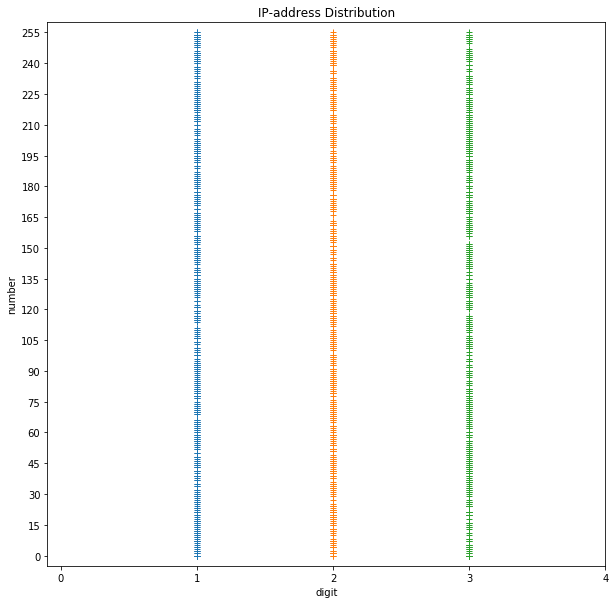

In [80]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import MultipleLocator

# fontproperties 设置中文显示，fontsize 设置字体大小
plt.figure(figsize=(10,10))
plt.title("IP-address Distribution") 
plt.xlabel("digit")
plt.ylabel("number")
plt.xlim(xmax=4,xmin=-0.1)
plt.ylim(ymax=260,ymin=-5)
x_major_locator=MultipleLocator(1)
#把x轴的刻度间隔设置为1，并存在变量里
y_major_locator=MultipleLocator(15)
#把y轴的刻度间隔设置为10，并存在变量里
ax=plt.gca()
#ax为两条坐标轴的实例
ax.xaxis.set_major_locator(x_major_locator)
#把x轴的主刻度设置为1的倍数
ax.yaxis.set_major_locator(y_major_locator)

x = []
y = []
for case in cases:
    str_list = case[0].address.split(".")
    x.append(1)
    y.append(int(str_list[0]))
# print(first[0])
plt.plot(x,y,'+') 

x = []
y = []
for case in cases:
    str_list = case[0].address.split(".")
    x.append(2)
    y.append(int(str_list[1]))
# print(first[0])
plt.plot(x,y,'+') 

x = []
y = []
for case in cases:
    str_list = case[0].address.split(".")
    x.append(3)
    y.append(int(str_list[2]))
# print(first[0])
plt.plot(x,y,'+') 

# plt.xticks(x, ["digit1","digit2","digit3"],color='blue',rotation=0)

 
plt.show()


# import numpy as np
# import matplotlib.pyplot as plt
# #数据
# x_num=np.array(np.arange(15))
# y_num=10*x_num+20*np.random.random(15)
# fig = plt.figure()
# # 画图（点图）
# # fig, ax = plt.subplots()
 
# ax = fig.add_subplot(3,2,1)
# ax.scatter(x_num, y_num)
# ax.set_xlabel('x')
# ax.set_ylabel(' y')
# plt.show()